# Data Cleaning

In [1]:
import pandas as pd
import os, warnings, sys, re

## Function Definitions

In [2]:
def to_Excel(cleaned_file_dict):
    for key in list(cleaned_file_dict):
        cleaned_file_dict[key].to_excel(
            os.path.join(
                data_path, 
                "Cleaned Data", 
                f"{key}"
                ),
            index=False,
            sheet_name=key.split(".")[0]
            )

def clean_sheet(xlFile, sheet_name, filename):
    '''
    xlFile = ExcelFile object
    sheet_name = Sheet name
    name = Name of the table
    '''
    # Get args
    if filename == "DC4406EW":
        # Get the personsperroom metric
        ppr = pd.read_excel(xlFile, sheet_name).iloc[6, 1]
        # Get the accomodationtype metric
        tenure = pd.read_excel(xlFile, sheet_name).iloc[5, 1]
        # Setting skiprows
        sr = 9
        # Setting truncate
        tr = -4
        # Making insertable column dictionary
        columnDict = {
            "tenure" : "Tenure",
            "ppr" : "Persons per Room"
            }
    elif filename == "LC2121EW":
        # Get the ethnic group metric
        eg = pd.read_excel(xlFile, sheet_name).iloc[5, 1]
        sr = 8
        tr = -1
        columnDict = {
            "eg" : "Ethnic Group"
        }
    elif filename == "QS402EW":
        # Get the rural urban metric
        ru = pd.read_excel(xlFile, sheet_name).iloc[5, 1]
        sr = 8
        tr = -1
        columnDict = {
            "ru" : "Rural Urban" 
        }
    elif filename == "RM139":
        ppr = pd.read_excel(xlFile, sheet_name).iloc[5, 1]
        ten = pd.read_excel(xlFile, sheet_name).iloc[6, 1]
        sr = 9
        tr = -1
        columnDict = {
            "ppr" : "Persons per Room",
            "ten" : "Tenure" 
        }
    else:
        return False
    
    # Get the full dataframe
    df = pd.read_excel(xlFile, sheet_name, skiprows=sr)
    df = df.dropna(how="all", axis=1)  # Drop completely empty columns
    df = df.dropna(how="all", axis=0)  # Drop completely empty rows
    
    # Add new columns to concatenate tables
    for item in columnDict.keys():
        df.insert(0, columnDict[item], locals()[item])

    # Rename Area code column
    df.rename(columns={"Unnamed: 1": "Areacode"}, inplace=True)

    # Truncate footers
    df = df.iloc[:tr]
    return df

## Working Files and Directory Definitions

In [3]:
# Current working directory
cwd = os.getcwd()

data_path = os.path.join(cwd, "Data")
data_2011_path = os.path.join(data_path, "2011 Census")
data_2021_path = os.path.join(data_path, "2021 Census")

In [4]:
# List of all files in Data
files_2011 = os.listdir(data_2011_path)
files_2021 = os.listdir(data_2021_path)

In [5]:
# Naming each file
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    RM139 = pd.ExcelFile(os.path.join(data_2021_path, files_2021[0]))
    file_dict = dict()
    for f in files_2011:
        code = f.split(" ")[0]
        file_dict[code] = pd.ExcelFile(os.path.join(data_2011_path, f))

In [6]:
DC4406EW = file_dict['DC4406EW']
LC2121EW = file_dict['LC2121EW']
QS402EW = file_dict['QS402EW']

## Cleaning Excel Files

In [7]:
# cleaned_dfs contains all sheets of the document
cleaned_DC4406EW = [
    clean_sheet(
        xlFile = DC4406EW, 
        sheet_name = sheet, 
        filename = "DC4406EW"
        ) for sheet in DC4406EW.sheet_names
        ]
cleaned_LC2121EW = [
    clean_sheet(
        xlFile = LC2121EW, 
        sheet_name = sheet, 
        filename = "LC2121EW"
        ) for sheet in LC2121EW.sheet_names
        ]
cleaned_QS402EW = [
    clean_sheet(
        xlFile = QS402EW, 
        sheet_name = sheet, 
        filename = "QS402EW"
        ) for sheet in QS402EW.sheet_names
        ]
cleaned_RM139 = [
    clean_sheet(
        xlFile = RM139, 
        sheet_name = sheet, 
        filename = "RM139"
        ) for sheet in RM139.sheet_names
        ]

In [8]:
DC4406EW = pd.concat(cleaned_DC4406EW, ignore_index=True)
LC2121EW = pd.concat(cleaned_LC2121EW, ignore_index=True)
QS402EW = pd.concat(cleaned_QS402EW, ignore_index=True)
RM139 = pd.concat(cleaned_RM139, ignore_index=True)

In [9]:
DC4406EW.to_excel(
    os.path.join(
        data_path, 
        "Cleaned Data", 
        "DC4406EW.xlsx"),
        index=False
        )

LC2121EW.to_excel(
    os.path.join(
        data_path, 
        "Cleaned Data", 
        "LC2121EW.xlsx"),
        index=False
        )

QS402EW.to_excel(
    os.path.join(
        data_path, 
        "Cleaned Data", 
        "QS402EW.xlsx"),
        index=False
        )

RM139.to_excel(
    os.path.join(
        data_path, 
        "Cleaned Data", 
        "RM139.xlsx"),
        index=False
        )

In [10]:
cleaned_path = os.path.join(data_path, "Cleaned Data")
# List of all files in Cleaned Data
cleaned = os.listdir(cleaned_path)

In [11]:
print(cleaned)

['BayesianPred.xlsx', 'DC4406EW.xlsx', 'Enriched.xlsx', 'Final_results.xlsx', 'LC2121EW.xlsx', 'merged_final.xlsx', 'QS402EW.xlsx', 'RM139.xlsx', 'summaryPredictions.xlsx']


In [12]:
# Naming each file
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    cleaned_file_dict = dict()
    for f in cleaned:
        cleaned_file_dict[f] = pd.read_excel(os.path.join(cleaned_path, f))

In [13]:
# Print all column names
def printColumns(cleaned_file_dict): 
    for key in list(cleaned_file_dict):
        print(f"Columns in {key}: ")
        for column in list(cleaned_file_dict[key]):
            print(column)
        print("\n\n")
    return None

In [14]:
# Common Columns in all cleaned sets
commonColumns = ["local authority: district / unitary (prior to April 2015)", "Areacode"]
# Removing brackets from column names
for key in list(cleaned_file_dict):
    for column in list(cleaned_file_dict[key]):
        newColumn = re.sub(r' \(.*\)', '', column)
        cleaned_file_dict[key] = cleaned_file_dict[key].rename(
            columns = {column: newColumn}
        )

## Columns in the Cleaned Files

In [15]:
printColumns(cleaned_file_dict)

Columns in BayesianPred.xlsx: 
Local Authority
Actual Overcrowding Rate
Predicted Overcrowding Rate
Error



Columns in DC4406EW.xlsx: 
Persons per Room
Tenure
local authority: district / unitary
Areacode
Whole house or bungalow: Total
Whole house or bungalow: Detached
Whole house or bungalow: Semi-detached
Whole house or bungalow: Terraced
Other: Total
Other: Flat, maisonette or apartment in a purpose-built block of flats or tenement
Other: Flat, maisonette or apartment that is part of a converted or shared house
Other: Flat, maisonette or apartment in a commercial building, or mobile/temporary accommodation



Columns in Enriched.xlsx: 
local authority: district / unitary
Areacode
Total Dwellings
Overcrowded Dwellings
Rural
Urban
tSNE-1
tSNE-2
UMAP-1
UMAP-2
UMAP Cluster
tSNE Cluster
Asian
Black
Mixed
Other
White
Total Ethnic Dwellings
Total Dwellings
Urban
Rural
Overcrowding Rate
Corr with Overcrowding
Corr with Overcrowding
Corr with Overcrowding
Corr with Overcrowding
Corr with Ove

In [16]:
to_Excel(cleaned_file_dict)

# New Relevant Column Calculations and Summarisation

In [17]:
dc_path = os.path.join(cleaned_path, "DC4406EW.xlsx")
rm_path = os.path.join(cleaned_path, "RM139.xlsx")
DC4406EW = pd.read_excel(dc_path)
RM139 = pd.read_excel(rm_path)

In [18]:
DC4406EW["Year"] = 2011
RM139["Year"] = 2021

In [19]:
DC4406EW.columns = DC4406EW.columns.str.strip()
RM139.columns = RM139.columns.str.strip()

In [20]:
RM139["Other: Total"] = (
    RM139.get("Flat, maisonette or apartment", 0).fillna(0) + 
    RM139.get("A caravan or other mobile or temporary structure", 0).fillna(0)
)
    
RM139 = RM139.drop(columns=[
    "Flat, maisonette or apartment",
    "A caravan or other mobile or temporary structure"
], errors='ignore')

In [21]:
rename_2021 = {
    "Whole house or bungalow": "Whole house or bungalow: Total",
    "Whole house or bungalow: Detached": "Whole house or bungalow: Detached",
    "Whole house or bungalow: Semi-detached": "Whole house or bungalow: Semi-detached",
    "Whole house or bungalow: Terraced": "Whole house or bungalow: Terraced",
    "Flat, maisonette or apartment": "Other: Total",
    "A caravan or other mobile or temporary structure": "Other: Flat, maisonette or apartment in a commercial building, or mobile/temporary accommodation"
}

In [22]:
category_mapping = {
    'Up to and including 0.5 people per room': 'Up to 0.5 persons per room',
    'Over 0.5 and up to 1.0 people per room': 'Over 0.5 and up to 1.0 persons per room',
    'Over 1.0 and up to 1.5 people per room': 'Over 1.0 and up to 1.5 persons per room',
    'Over 1.5 people per room': 'Over 1.5 persons per room',
    'Up to 0.5 persons per room': 'Up to 0.5 persons per room',
    'Over 0.5 and up to 1.0 persons per room': 'Over 0.5 and up to 1.0 persons per room',
    'Over 1.0 and up to 1.5 persons per room': 'Over 1.0 and up to 1.5 persons per room',
    'Over 1.5 persons per room': 'Over 1.5 persons per room'
}

In [23]:
DC4406EW["Persons per Room"] = DC4406EW["Persons per Room"].map(category_mapping)
RM139["Persons per Room"] = RM139["Persons per Room"].map(category_mapping)

In [24]:
common_cols = list(set(DC4406EW.columns).intersection(set(RM139.columns)))
print(common_cols)

['Whole house or bungalow: Terraced', 'Other: Total', 'Areacode', 'Whole house or bungalow: Detached', 'Tenure', 'Persons per Room', 'Year', 'Whole house or bungalow: Semi-detached', 'local authority: district / unitary']


In [25]:
DC4406EW = DC4406EW[common_cols]
RM139 = RM139[common_cols]

In [26]:
combined_data = pd.concat([DC4406EW, RM139], ignore_index=True)

In [27]:
combined_data['Whole: Total'] = (
    combined_data['Whole house or bungalow: Detached'] + 
    combined_data['Whole house or bungalow: Semi-detached'] + 
    combined_data['Whole house or bungalow: Terraced']
)

overcrowded = combined_data['Persons per Room'].isin([
    'Over 1.0 and up to 1.5 persons per room',
    'Over 1.5 persons per room'
])
combined_data['Total Dwellings'] = combined_data['Whole: Total'] + combined_data['Other: Total']

In [28]:
combined_data['Overcrowded Dwellings'] = combined_data['Total Dwellings'].where(overcrowded, 0)

In [29]:
summary_df = combined_data.groupby(['local authority: district / unitary', 'Year']).agg({
    'Total Dwellings': 'sum',
    'Overcrowded Dwellings': 'sum'
}).reset_index()

In [30]:
summary_df['Overcrowding Rate (%)'] = (
    summary_df['Overcrowded Dwellings'] / summary_df['Total Dwellings']
) * 100

## Linear Regression for Total Dwellings

In [31]:
summary_df.columns = summary_df.columns.str.replace(r'\s+', ' ', regex=True).str.strip()

### Split data for different column names

In [32]:
df_2011 = summary_df[summary_df['Year'] == 2011][
    ['local authority: district / unitary', 'Total Dwellings', 'Overcrowding Rate (%)']
    ].copy()

df_2011.columns = ['Local Authority', 'Total Dwellings 2011', 'Overcrowding Rate 2011']

df_2021 = summary_df[summary_df['Year'] == 2021][
    ['local authority: district / unitary', 'Total Dwellings']
    ].copy()

df_2021.columns = ['Local Authority', 'Total Dwellings 2021']

In [33]:
df_merged = pd.merge(df_2011, df_2021, on='Local Authority', how='left')

## Implement Linear Regression to predict missing Total Dwellings 2021

In [34]:
from sklearn.linear_model import LinearRegression

td_train = df_merged.dropna(subset=['Total Dwellings 2021'])
X_td_train = td_train[['Total Dwellings 2011']]
y_td_train = td_train['Total Dwellings 2021']

In [35]:
td_model = LinearRegression()
td_model.fit(X_td_train, y_td_train)

LinearRegression()

In [36]:
df_merged['Predicted TD 2021'] = td_model.predict(df_merged[['Total Dwellings 2011']])
df_merged['Final TD 2021'] = df_merged['Total Dwellings 2021']
df_merged.loc[df_merged['Final TD 2021'].isnull(), 'Final TD 2021'] = df_merged['Predicted TD 2021']

## Bayesian Ridge Regression for Overcrowding

### Merge the results from Linear Regression

In [37]:
df_final_input = pd.merge(
    df_2011[['Local Authority', 'Total Dwellings 2011', 'Overcrowding Rate 2011']],
    df_merged[['Local Authority', 'Final TD 2021']],
    on='Local Authority',
    how='left'
)

### Training data prep

In [38]:
df_2021_full = summary_df[summary_df['Year'] == 2021][
    ['local authority: district / unitary', 'Overcrowding Rate (%)']
].rename(columns={
    'local authority: district / unitary': 'Local Authority',
    'Overcrowding Rate (%)': 'Overcrowding Rate 2021'
})

df_final_input = pd.merge(df_final_input, df_2021_full, on='Local Authority', how='left')

In [39]:
train_data = df_final_input.dropna(subset=['Overcrowding Rate 2021'])
X_train = train_data[['Overcrowding Rate 2011', 'Final TD 2021']]
y_train = train_data['Overcrowding Rate 2021']

## Bayesian Ridge Regression Implementation

In [40]:
from sklearn.linear_model import BayesianRidge
model = BayesianRidge()
model.fit(X_train, y_train)

BayesianRidge()

In [41]:
df_final_input['Predicted Overcrowding Rate (2021)'] = model.predict(
    df_final_input[['Overcrowding Rate 2011', 'Final TD 2021']]
)

### Use predicted values to fill only missing values

In [42]:
df_final_input['Final Overcrowding Rate (2021)'] = df_final_input['Overcrowding Rate 2021']

df_final_input.loc[
    df_final_input['Final Overcrowding Rate (2021)'].isnull(), 
    'Final Overcrowding Rate (2021)'
    ] = df_final_input['Predicted Overcrowding Rate (2021)']

df_final_input['Source'] = df_final_input['Overcrowding Rate 2021'].apply(
    lambda x: 'Observed' if pd.notnull(x) else 'Imputed'
)

In [43]:
final_path = os.path.join(cleaned_path, "Final_results.xlsx")
df_final_input.to_excel(final_path, index=False)

### Evaluation for Bayesian Ridge Regression

In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [45]:
train_rows = df_final_input[df_final_input['Source'] == 'Observed']

y_true = train_rows['Overcrowding Rate 2021']
y_pred = train_rows['Predicted Overcrowding Rate (2021)']

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

summary = {
    "RMSE": round(rmse, 3),
    "MAE": round(mae, 3),
    "R² Score": round(r2, 3),
    "Training Samples": len(train_rows)
}
print(summary)
summary = pd.DataFrame([summary])
path_for_dict = os.path.join(cleaned_path, "summaryPredictions.xlsx")
summary.to_excel(path_for_dict, index=False)

{'RMSE': 1.279, 'MAE': 0.883, 'R² Score': 0.862, 'Training Samples': 306}


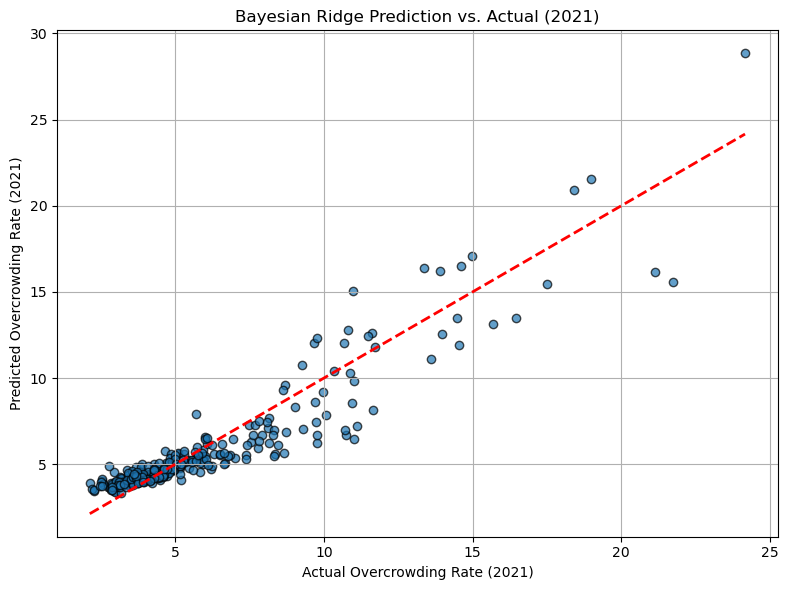

2.1241122813767452 24.158708995991585


In [46]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted overcrowding rate (2021)
plt.figure(figsize=(8, 6))
plt.scatter(y_true, y_pred, alpha=0.7, edgecolors='k')
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
plt.xlabel('Actual Overcrowding Rate (2021)')
plt.ylabel('Predicted Overcrowding Rate (2021)')
plt.title('Bayesian Ridge Prediction vs. Actual (2021)')
plt.grid(True)
plt.tight_layout()
plt.savefig("Error Rates.png")
plt.show()
print(y_true.min(), y_true.max())

### Exporting the plot to Tableau

In [47]:
print(train_rows.columns)
results_df = pd.DataFrame({
    "Local Authority": train_rows["Local Authority"],
    "Actual Overcrowding Rate (2021)": y_true,
    "Predicted Overcrowding Rate (2021)": y_pred,
    "Error": y_true - y_pred
})

predplot_path = os.path.join(cleaned_path, "BayesianPred.xlsx")
results_df.to_excel(predplot_path, index=False)

Index(['Local Authority', 'Total Dwellings 2011', 'Overcrowding Rate 2011',
       'Final TD 2021', 'Overcrowding Rate 2021',
       'Predicted Overcrowding Rate (2021)', 'Final Overcrowding Rate (2021)',
       'Source'],
      dtype='object')


## Pivoting Columns from the other 2011 data

In [48]:
combined_data.columns = combined_data.columns.str.replace(r'\s+', ' ', regex=True).str.strip()
combined_2011 = combined_data[combined_data['Year'] == 2011].copy()

In [49]:
lc_path = os.path.join(data_path, "Cleaned Data", "LC2121EW.xlsx")
LC2121EW = pd.read_excel(lc_path)
LC2121EW.columns = LC2121EW.columns.str.replace(r'\s+', ' ', regex=True).str.strip()
print(LC2121EW.columns)

Index(['Ethnic Group', 'local authority: district / unitary', 'Areacode',
       'Whole house or bungalow: Total', 'Whole house or bungalow: Detached',
       'Whole house or bungalow: Semi-detached',
       'Whole house or bungalow: Terraced',
       'Flat, maisonette or apartment, or mobile/temporary accommodation'],
      dtype='object')


In [50]:
qs_path = os.path.join(data_path, "Cleaned Data", "QS402EW.xlsx")
QS402EW = pd.read_excel(qs_path)
QS402EW.columns = QS402EW.columns.str.replace(r'\s+', ' ', regex=True).str.strip()
print(QS402EW.columns)

Index(['Rural Urban', 'local authority: district / unitary', 'Areacode',
       'Unshared dwelling: Total',
       'Unshared dwelling: Whole house or bungalow: Total',
       'Unshared dwelling: Whole house or bungalow: Detached',
       'Unshared dwelling: Whole house or bungalow: Semi-detached',
       'Unshared dwelling: Whole house or bungalow: Terraced',
       'Unshared dwelling: Flat, maisonette or apartment: Total',
       'Unshared dwelling: Flat, maisonette or apartment: Purpose-built block of flats or tenement',
       'Unshared dwelling: Flat, maisonette or apartment: Part of a converted or shared house',
       'Unshared dwelling: Flat, maisonette or apartment: In commercial building',
       'Unshared dwelling: Caravan or other mobile or temporary structure',
       'Shared dwelling'],
      dtype='object')


## Merge with other data

In [51]:
LC_pivot = LC2121EW.pivot_table(
    index=['local authority: district / unitary', 'Areacode'],
    columns='Ethnic Group',
    values='Whole house or bungalow: Total',
    aggfunc='sum'
).reset_index()

In [52]:
QS_pivot = QS402EW.pivot_table(
    index=['local authority: district / unitary', 'Areacode'],
    columns='Rural Urban',
    values='Unshared dwelling: Total',
    aggfunc='sum'
).reset_index()

### Aggregating the 2011 by Local Authority

In [53]:
combined_agg = combined_2011.groupby(
    ['local authority: district / unitary', 'Areacode']
)[['Total Dwellings', 'Overcrowded Dwellings']].sum().reset_index()

### Merging

In [54]:
merged_features = combined_agg.merge(LC_pivot, on=['local authority: district / unitary', 'Areacode'], how='left')
merged_features = merged_features.merge(QS_pivot, on=['local authority: district / unitary', 'Areacode'], how='left')

In [55]:
print(merged_features.columns)

Index(['local authority: district / unitary', 'Areacode', 'Total Dwellings',
       'Overcrowded Dwellings', 'Asian/Asian British',
       'Black/African/Caribbean/Black British', 'Mixed/multiple ethnic group',
       'Other ethnic group', 'White: Total', 'Rural (total)', 'Urban (total)'],
      dtype='object')


# Dimensionality Reduction

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import umap.umap_ as umap

In [57]:
numeric_features = merged_features.drop(columns=['local authority: district / unitary', 'Areacode'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_features.fillna(0))

In [58]:
tsne = TSNE(n_components=2, random_state=2555304, perplexity=30)
tsne_embedding = tsne.fit_transform(X_scaled)

In [59]:
umap_model = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1)
umap_embedding = umap_model.fit_transform(X_scaled)

E:\AcademicsAndMiscellaneous\anaconda3\envs\text_analytics\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [60]:
merged_features['tSNE-1'] = tsne_embedding[:, 0]
merged_features['tSNE-2'] = tsne_embedding[:, 1]
merged_features['UMAP-1'] = umap_embedding[:, 0]
merged_features['UMAP-2'] = umap_embedding[:, 1]

In [61]:
merged_path = os.path.join(cleaned_path, "merged_final.xlsx")
merged_features.to_excel(merged_path, index=False)

## K-Means Clustering

In [62]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### Cluster Number Definition

In [63]:
results = []
k_range = range(2, 11)

for method_name, coords in [('UMAP', merged_features[['UMAP-1', 'UMAP-2']].dropna()), 
                            ('tSNE', merged_features[['tSNE-1', 'tSNE-2']].dropna())]:
    inertia_vals = []
    silhouette_vals = []
    
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=2555304)
        labels = kmeans.fit_predict(coords)
        inertia_vals.append(kmeans.inertia_)
        silhouette_vals.append(silhouette_score(coords, labels))
    
    plt.figure(figsize=(6, 4))
    plt.plot(k_range, inertia_vals, 'o-')
    plt.title(f"{method_name}: Elbow Method")
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Inertia")
    plt.tight_layout()
    plt.savefig(f"{method_name}_elbow_plot.png")
    plt.close()

    plt.figure(figsize=(6, 4))
    plt.plot(k_range, silhouette_vals, 'o-')
    plt.title(f"{method_name}: Silhouette Score")
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Silhouette Score")
    plt.tight_layout()
    plt.savefig(f"{method_name}_silhouette_plot.png")
    plt.close()

In [64]:
opt_k = 3

In [65]:
umapcoords = merged_features[['UMAP-1', 'UMAP-2']]
tsnecoords = merged_features[['tSNE-1', 'tSNE-2']]

kmeans_umap = KMeans(n_clusters=opt_k)
kmeans_tsne = KMeans(n_clusters=opt_k)

merged_features['UMAP Cluster'] = kmeans_umap.fit_predict(umapcoords)
merged_features['tSNE Cluster'] = kmeans_tsne.fit_predict(tsnecoords)

In [66]:
merged_features.to_excel(merged_path, index=False)

## Data Prep for Visualisation

### Wide to Long Formatting

In [67]:
final_path = os.path.join(cleaned_path, "Final_results.xlsx")
df_final_input = pd.read_excel(final_path)

In [68]:
long_2011 = df_final_input[['Local Authority', 'Overcrowding Rate 2011']].copy()
long_2011['Year'] = 2011
long_2011['Overcrowding Rate (%)'] = long_2011['Overcrowding Rate 2011']
long_2011['Source'] = 'Observed'

In [69]:
long_2021 = df_final_input[['Local Authority', 'Final Overcrowding Rate (2021)', 'Source']].copy()
long_2021['Year'] = 2021
long_2021.rename(columns={'Final Overcrowding Rate (2021)': 'Overcrowding Rate (%)'}, inplace=True)

In [70]:
final_long = pd.concat([
    long_2011[['Local Authority', 'Year', 'Overcrowding Rate (%)', 'Source']],
    long_2021[['Local Authority', 'Year', 'Overcrowding Rate (%)', 'Source']]
], ignore_index=True)

In [71]:
final_long.to_excel(final_path, index=False)

### % Housing by Ethnic Group

In [72]:
LC2121EW['Total Dwellings'] = (
    LC2121EW['Whole house or bungalow: Total'] +
    LC2121EW['Flat, maisonette or apartment, or mobile/temporary accommodation']
)

LC_pivot = LC2121EW.pivot_table(
    index='local authority: district / unitary',
    columns='Ethnic Group',
    values='Total Dwellings',
    aggfunc='sum'
).reset_index()

In [73]:
LC_pivot['Total Ethnic Housing'] = LC_pivot.drop(columns='local authority: district / unitary').sum(axis=1)

for column in LC_pivot.columns[1:-1] :
    LC_pivot[column] = (LC_pivot[column] / LC_pivot['Total Ethnic Housing']) * 100

### % Housing by Rural vs Urban

In [74]:
QS402EW['Total Dwellings'] = (
    QS402EW['Unshared dwelling: Total'] +
    QS402EW['Shared dwelling']
)

QS_pivot = QS402EW.pivot_table(
    index='local authority: district / unitary',
    columns='Rural Urban',
    values='Total Dwellings',
    aggfunc='sum'
).reset_index()

QS_pivot.columns.name = None  # remove column name assigned by pivot
QS_pivot.rename(columns={
    'Urban (total)': 'Urban',
    'Rural (total)': 'Rural'
}, inplace=True)

In [75]:
QS_pivot['Total Dwellings RU'] = QS_pivot[['Urban', 'Rural']].fillna(0).sum(axis=1)

QS_pivot['Urban (%)'] = QS_pivot['Urban'] / QS_pivot['Total Dwellings RU']*100
QS_pivot['Rural (%)'] = QS_pivot['Rural'] / QS_pivot['Total Dwellings RU']*100

In [76]:
Enriched = merged_features.merge(LC_pivot, on='local authority: district / unitary', how='left')
Enriched = Enriched.merge(QS_pivot, on='local authority: district / unitary', how='left')

In [77]:
print(Enriched.columns)

Index(['local authority: district / unitary', 'Areacode', 'Total Dwellings',
       'Overcrowded Dwellings', 'Asian/Asian British_x',
       'Black/African/Caribbean/Black British_x',
       'Mixed/multiple ethnic group_x', 'Other ethnic group_x',
       'White: Total_x', 'Rural (total)', 'Urban (total)', 'tSNE-1', 'tSNE-2',
       'UMAP-1', 'UMAP-2', 'UMAP Cluster', 'tSNE Cluster',
       'Asian/Asian British_y', 'Black/African/Caribbean/Black British_y',
       'Mixed/multiple ethnic group_y', 'Other ethnic group_y',
       'White: Total_y', 'Total Ethnic Housing', 'Rural', 'Urban',
       'Total Dwellings RU', 'Urban (%)', 'Rural (%)'],
      dtype='object')


### Fix naming and keep only relevant columns

In [78]:
Enriched.rename(columns={
    'White: Total_y': 'White (%)',
    'Asian/Asian British_y': 'Asian (%)',
    'Black/African/Caribbean/Black British_y': 'Black (%)',
    'Mixed/multiple ethnic group_y': 'Mixed (%)',
    'Other ethnic group_y': 'Other (%)',
    'Urban (total)_y': 'Urban (%)',
    'Rural (total)_y': 'Rural (%)',
    'Total Ethnic Housing': 'Total Ethnic Dwellings',
    'Total Dwellings RU': 'Total Dwellings (Urban + Rural)',
}, inplace=True)

print(Enriched.columns)

Enriched.drop(columns=[
    'White: Total_x',
    'Asian/Asian British_x',
    'Black/African/Caribbean/Black British_x',
    'Mixed/multiple ethnic group_x',
    'Other ethnic group_x',
    'Urban',
    'Rural'
], inplace=True)

"""
'local authority: district / unitary', 'Areacode', 'Total Dwellings',
       'Overcrowded Dwellings',
       'Rural (total)', 'Urban (total)', 'tSNE-1', 'tSNE-2',
       'UMAP-1', 'UMAP-2', 'UMAP Cluster', 'tSNE Cluster', 'Asian (%)',
       'Black (%)', 'Mixed (%)', 'Other (%)', 'White (%)',
       'Total Ethnic Dwellings',
       'Total Dwellings (Urban + Rural)', 'Urban (%)', 'Rural (%)'
"""

Index(['local authority: district / unitary', 'Areacode', 'Total Dwellings',
       'Overcrowded Dwellings', 'Asian/Asian British_x',
       'Black/African/Caribbean/Black British_x',
       'Mixed/multiple ethnic group_x', 'Other ethnic group_x',
       'White: Total_x', 'Rural (total)', 'Urban (total)', 'tSNE-1', 'tSNE-2',
       'UMAP-1', 'UMAP-2', 'UMAP Cluster', 'tSNE Cluster', 'Asian (%)',
       'Black (%)', 'Mixed (%)', 'Other (%)', 'White (%)',
       'Total Ethnic Dwellings', 'Rural', 'Urban',
       'Total Dwellings (Urban + Rural)', 'Urban (%)', 'Rural (%)'],
      dtype='object')


"\n'local authority: district / unitary', 'Areacode', 'Total Dwellings',\n       'Overcrowded Dwellings',\n       'Rural (total)', 'Urban (total)', 'tSNE-1', 'tSNE-2',\n       'UMAP-1', 'UMAP-2', 'UMAP Cluster', 'tSNE Cluster', 'Asian (%)',\n       'Black (%)', 'Mixed (%)', 'Other (%)', 'White (%)',\n       'Total Ethnic Dwellings',\n       'Total Dwellings (Urban + Rural)', 'Urban (%)', 'Rural (%)'\n"

In [85]:
Enriched['Overcrowding Rate (%)'] = (Enriched['Overcrowded Dwellings'] / Enriched['Total Dwellings'])
enriched_path = os.path.join(cleaned_path, "Enriched.xlsx")
Enriched.to_excel(enriched_path, index=False)

In [105]:
ethnicity_cols = ['Asian (%)', 'Black (%)', 'Mixed (%)', 'Other (%)', 'White (%)']
target_col = 'Overcrowding Rate (%)'

In [106]:
correlations = Enriched[ethnicity_cols + [target_col]].corr()[target_col].drop(target_col)
mean_correlation = correlations.mean()
mean_abs_correlation = correlations.abs().mean()

### Some data manipulation for the correlation chart in Tableau to match with Ethnicity parameter

In [107]:
print(correlations, "\n", mean_correlation, mean_abs_correlation)
correlations = correlations.rename_axis('EthnicityPer').reset_index()
print(type(correlations))

Asian (%)    0.813582
Black (%)    0.833854
Mixed (%)    0.773022
Other (%)    0.762683
White (%)   -0.927078
Name: Overcrowding Rate (%), dtype: float64 
 0.4512122526349123 0.8220436384626713
<class 'pandas.core.frame.DataFrame'>


In [108]:
correlations["EthnicityPer"] = correlations["EthnicityPer"].str.replace(r" \(%\)", "", regex=True)
print(correlations)

  EthnicityPer  Overcrowding Rate (%)
0        Asian               0.813582
1        Black               0.833854
2        Mixed               0.773022
3        Other               0.762683
4        White              -0.927078


In [109]:
ethnicityCorr_path = os.path.join(cleaned_path, "ethnicityCorr.xlsx")
correlations.to_excel(ethnicityCorr_path, index=False)